In [2]:
import allel
import sys
import pandas as pd
import math
import argparse
import vcf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<H2>Plot Figure 1</H2>

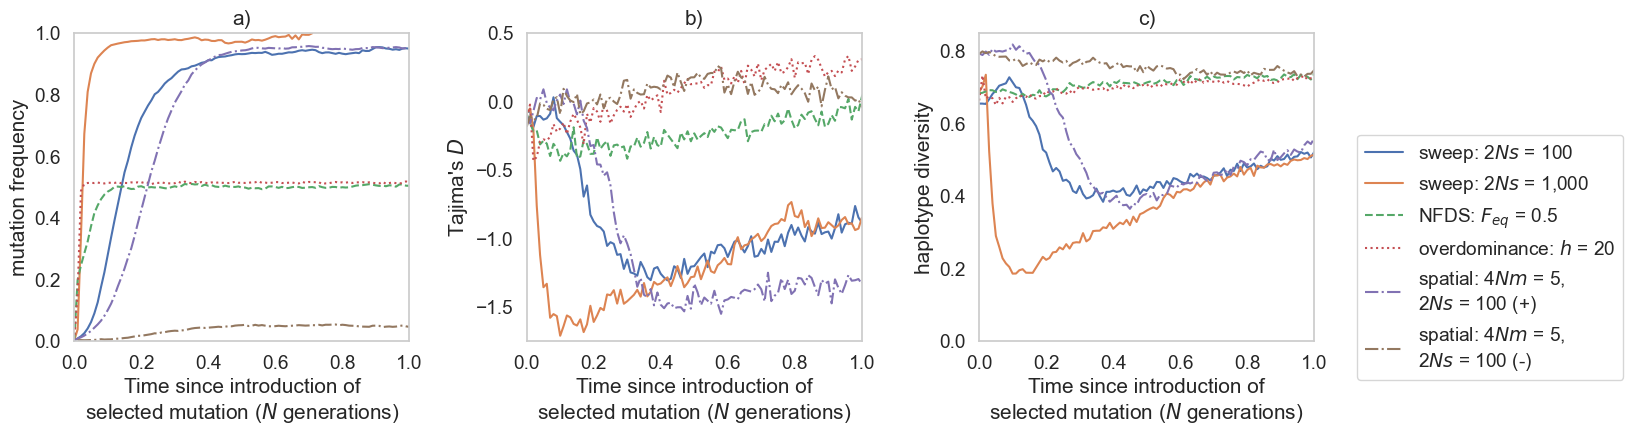

In [256]:
#Load mutation frequencies into lists for each of the selectionmodels
lst = []
#Loop through selection regimes (or eq frequencies of nfds, dominance coefficients for overdominance etc).
for Nes in [100, 1000]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        #Load in output from SLiM
        df = pd.read_csv(r"/Volumes/WD/nfds/sweep_traj/" + str(Nes) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        #Calculate how many N generations prior to current day sampling time is
        df['gen_N'] = (df.gen - 5000) / 500
        #Calculate allele frequency
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])
    #Get mean allele frequency for each sampling time
    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst.append(df10)
    
    
lst2 = []
for Feq in [0.1, 0.25, 0.5]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/nfds_traj/" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst2.append(df10)


lst3 = []
for Feq in [1.5, 20]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/od_traj/" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst3.append(df10)


lst4 = []
for Feq in [0.0025]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/spat_traj/100_" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df[df['pop']=='p1']
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst4.append(df10)


lst5 = []
for Feq in [0.0025]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/spat_traj/100_" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df[df['pop']=='p2']
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst5.append(df10)

#Load in stats
sweep_df = pd.read_csv(r"/Volumes/WD/nfds/sweep_traj/stats.txt", sep='\t', header=0)
od_df = pd.read_csv(r"/Volumes/WD/nfds/od_traj/stats.txt", sep='\t', header=0)
nfds_df = pd.read_csv(r"/Volumes/WD/nfds/nfds_traj/stats.txt", sep='\t', header=0)
spat_df = pd.read_csv(r"/Volumes/WD/nfds/spat_traj/stats.txt", sep='\t', header=0)
spat_df = spat_df[spat_df['s'] == 100]
spat_df1 = spat_df[spat_df['population']=='p1']
spat_df2 = spat_df[spat_df['population']=='p2']

#Split stats by parameterization
sweep_hd_df = pd.DataFrame(sweep_df.groupby(['2Nes', 'gen'])['hapdiv'].mean()).reset_index()
sweep_t_df = pd.DataFrame(sweep_df.groupby(['2Nes', 'gen'])['tajd'].mean()).reset_index()
od_hd_df = pd.DataFrame(od_df.groupby(['h', 'gen'])['hapdiv'].mean()).reset_index()
od_t_df = pd.DataFrame(od_df.groupby(['h', 'gen'])['tajd'].mean()).reset_index()
nfds_hd_df = pd.DataFrame(nfds_df.groupby(['Feq', 'gen'])['hapdiv'].mean()).reset_index()
nfds_t_df = pd.DataFrame(nfds_df.groupby(['Feq', 'gen'])['tajd'].mean()).reset_index()
spat_hd_df1 = pd.DataFrame(spat_df1.groupby(['s', 'gen'])['hapdiv'].mean()).reset_index()
spat_t_df1 = pd.DataFrame(spat_df1.groupby(['s', 'gen'])['tajd'].mean()).reset_index()
spat_hd_df2 = pd.DataFrame(spat_df2.groupby(['s', 'gen'])['hapdiv'].mean()).reset_index()
spat_t_df2 = pd.DataFrame(spat_df2.groupby(['s', 'gen'])['tajd'].mean()).reset_index()

#Plot
sns.set(rc={'figure.figsize':(16,4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
plt.subplot(1,3,1)

plt.plot(lst[0].gen, lst[0].AF, label= r'sweep: 2$N_es$ = 100', linestyle='-')
plt.plot(lst[1].gen, lst[1].AF, label= r'sweep: 2$N_es$ = 1,000', linestyle='-')


plt.plot(lst2[2].gen, lst2[2].AF, label= r'NFDS: $F_eq$ = 0.5', linestyle='--')

plt.plot(lst3[1].gen, lst3[1].AF, label= r'overdominance: $h$ = 20', linestyle=':')

plt.plot(lst4[0].gen, lst4[0].AF, label= r'spatial: $m$ = 0.1', linestyle='-.')
plt.plot(lst5[0].gen, lst5[0].AF, label= r'spatial: $m$ = 0.1', linestyle='-.')

plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("mutation frequency")
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.title('a)')

plt.subplot(1,3,2)
plt.plot([t/500 for t in range(0,1005, 5)], sweep_t_df[sweep_t_df['2Nes']==100]['tajd'], label=r'sweep: 2$N_es$ = 100', linestyle='-')
plt.plot([t/500 for t in range(0,1005, 5)], sweep_t_df[sweep_t_df['2Nes']==1000]['tajd'], label=r'sweep: 2$N_es$ = 1000', linestyle='-')
plt.plot([t/500 for t in range(0,1005, 5)], nfds_t_df[nfds_t_df['Feq']==0.5]['tajd'], label= r'NFDS: $F_eq$ = 0.5', linestyle='--')
plt.plot([t/500 for t in range(0,1005, 5)], od_t_df[od_t_df['h']==20]['tajd'], label= r'overdominance: $h$ = 20', linestyle=':')
plt.plot([t/500 for t in range(0,1005, 5)], spat_t_df1['tajd'], label= r'spatial: 4$Nm$ = 0.1', linestyle='-.')
plt.plot([t/500 for t in range(0,1005, 5)], spat_t_df2['tajd'], label= r'spatial: 4$Nm$ = 0.1', linestyle='-.')

plt.xlim([0, 1])
plt.ylim([-1.75, 0.5])
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.ylabel(r"Tajima's $D$")
plt.title('b)')

plt.subplot(1,3,3)
plt.plot([t/500 for t in range(0,1005, 5)], sweep_hd_df[sweep_hd_df['2Nes']==100]['hapdiv'], label=r'sweep: 2$Ns$ = 100', linestyle='-')
plt.plot([t/500 for t in range(0,1005, 5)], sweep_hd_df[sweep_hd_df['2Nes']==1000]['hapdiv'], label=r'sweep: 2$Ns$ = 1,000', linestyle='-')
plt.plot([t/500 for t in range(0,1005, 5)], nfds_hd_df[nfds_hd_df['Feq']==0.5]['hapdiv'], label= r'NFDS: $F_{eq}$ = 0.5', linestyle='--')
plt.plot([t/500 for t in range(0,1005, 5)], od_hd_df[od_hd_df['h']==20]['hapdiv'], label= r'overdominance: $h$ = 20', linestyle=':')
plt.plot([t/500 for t in range(0,1005, 5)], spat_hd_df1['hapdiv'], label= r'spatial: 4$Nm$ = 5,' + '\n' +'2$Ns$ = 100 (+)', linestyle='-.')
plt.plot([t/500 for t in range(0,1005, 5)], spat_hd_df2['hapdiv'], label= r'spatial: 4$Nm$ = 5,' + '\n' +'2$Ns$ = 100 (-)', linestyle='-.')
plt.title('c)')
plt.xlim([0, 1])
plt.ylim([0, 0.85])
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.ylabel("haplotype diversity")
plt.legend(bbox_to_anchor=(1.1,0.7))
plt.subplots_adjust(wspace=0.35, hspace=0.45)

plt.savefig('/Volumes/WD/nfds/plots/fig1_NEW.png', format='png', bbox_inches='tight')

<h2>Plot Figure 2</h2>

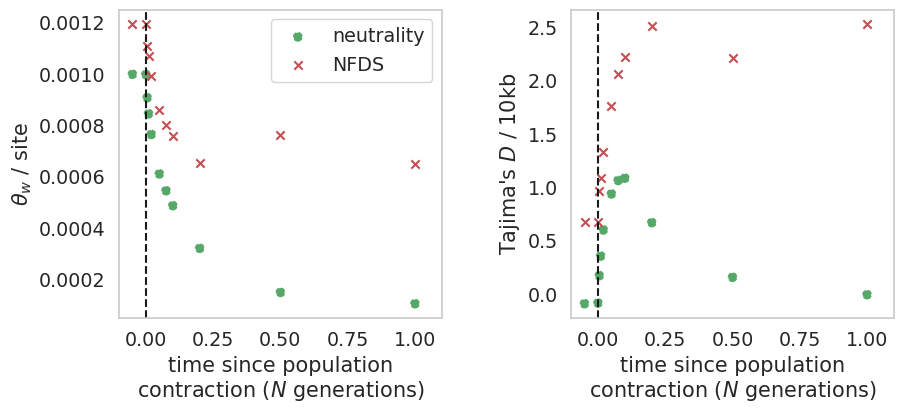

In [3]:
sns.set(rc={'figure.figsize':(10, 4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)

ylabs = [r'$\theta_w$ / site', r"Tajima's $D$ / 10kb"]
#n0.1 n0.05 0 0.005 0.01 0.02 0.05 0.075 0.1 0.2 0.5 1 1.195
d = {'n0.05':-0.05, '0': 0, '0.005':0.005, '0.01':0.01, '0.02':0.02, '0.05':0.05, '0.075':0.075, '0.1':0.1, '0.2':0.2, '0.5':0.5, '1':1}
for x, stat in enumerate(['thetaw', 'tajimasd']):
    plt.subplot(1,2,x+1)
    n = []
    n2 = []
    bs = []
    bs2 = []
    for key, value in d.items():
        rdf1 = pd.DataFrame()
        rdf2 = pd.DataFrame()
        for rep in range(1, 101):
            try:
                f = pd.read_csv(r"/home/vivak/nfds/contraction/neutral/" + str(key) + "N_rep" + str(rep) + ".stats", sep='\t', header=0)
                f['thetaw'] = f.thetaw / 10000
                rdf1 = pd.concat([rdf1,f])
            except Exception:
                pass
    
            try:
                f = pd.read_csv(r"/home/vivak/nfds/contraction/bs/" + str(key) + "N_rep" + str(rep) + ".stats", sep='\t', header=0)
                f['thetaw'] = f.thetaw / 10000
                rdf2 = pd.concat([rdf2,f])
            except Exception:
                pass
            
        n.append(np.mean(rdf1[stat]))
        bs.append(np.mean(rdf2[stat]))
        n2.append(np.std(rdf1[stat]))
        bs2.append(np.std(rdf2[stat]))

    plt.axvline(0, color='k', linestyle='--')
    plt.scatter(d.values(), n, linestyle='--', c='g', label='neutrality')

    plt.scatter(d.values(), bs, marker='x', c='r', label='NFDS')
    plt.ylabel(ylabs[x])
    plt.xlabel(r'time since population' + '\n' + 'contraction ($N$ generations)')
    plt.xlim([-0.1, 1.1])
    if(x==0):
        plt.legend()
plt.subplots_adjust(wspace=0.4, hspace=0.45)
#plt.savefig('/home/vivak/nfds/plots/fig2.png', format='png', bbox_inches='tight')

<h2>Plot Figure 3</h2>

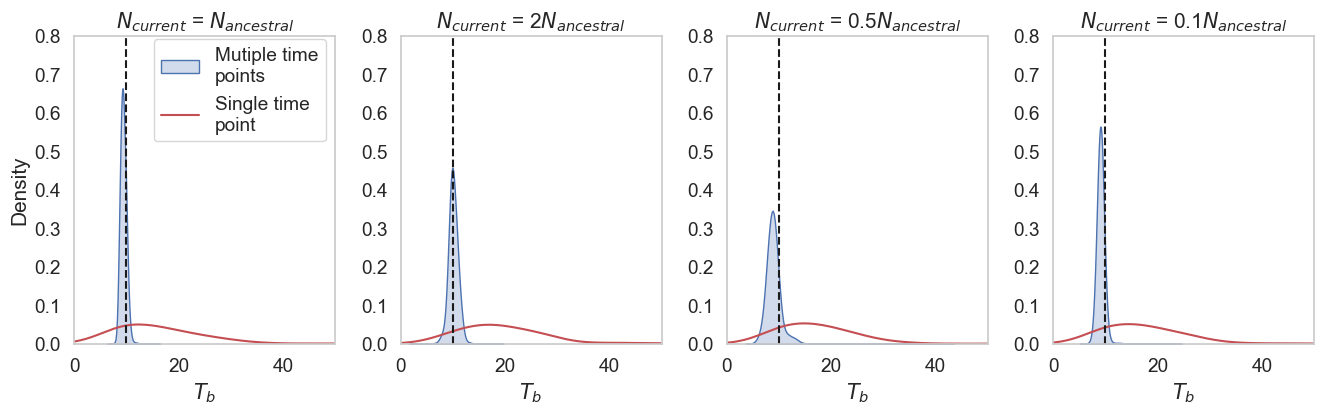

In [255]:
l = [1,3,5,7]
titles = [r"$N_{current}$ = $N_{ancestral}$", r"$N_{current}$ = 2$N_{ancestral}$", r"$N_{current}$ = 0.5$N_{ancestral}$", r"$N_{current}$ = 0.1$N_{ancestral}$"]
sns.set(rc={'figure.figsize':(16,4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
for d,demog in enumerate(['eq', 'expansion', 'contraction', 'severe_contraction']):
    df1 = pd.read_csv(r"/Volumes/WD/nfds/posteriors/nnet/" + demog + "_0.txt", sep='\t', header=0)
    #df1['Tb'] = np.exp(df1['Tb'])
    df2 = pd.read_csv(r"/Volumes/WD/nfds/posteriors/nnet/" + demog + "_0_st.txt", sep='\t', header=0)
    #df2['Tb'] = np.exp(df2['Tb'])
    #df1['Feq'] = np.where(df1.Feq>0.5, 1-df1.Feq, df1.Feq)
    #df2['Feq'] = np.where(df2.Feq>0.5, 1-df2.Feq, df2.Feq)
    plt.subplot(1,4,d+1)
    sns.kdeplot(np.array(df1['Tb']), fill=True, bw_method=0.5, label='Mutiple time\npoints')
    sns.kdeplot(np.array(df2['Tb']), fill=False, bw_method=0.6, c='r', label='Single time\npoint')
    plt.axvline(x=10, c='k', linestyle='--')
    plt.xlim([0, 50])
    plt.ylim([0, 0.8])
    plt.xlabel(r'$T_{b}$')
    if(d==0):
        plt.legend(bbox_to_anchor=(1, 1.02))
    else:
        plt.ylabel('')
    plt.title(titles[d])

plt.subplots_adjust(wspace=0.25, hspace=0.5)
plt.savefig('/Volumes/WD/nfds/plots/fig3_NEW.png', format='png', bbox_inches='tight')

<h2>Plot Supplementary Figure S1</h2>

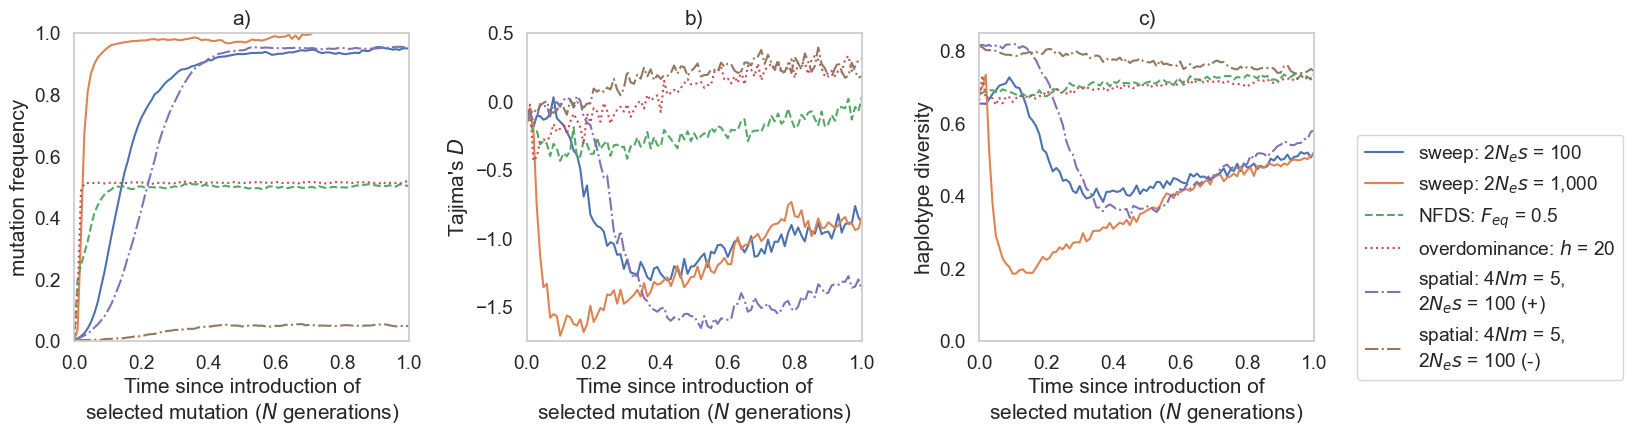

In [172]:
lst = []
for Nes in [100, 1000]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/sweep_traj/" + str(Nes) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst.append(df10)
    
    
lst2 = []
for Feq in [0.1, 0.25, 0.5]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/nfds_traj/" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst2.append(df10)


lst3 = []
for Feq in [1.5, 20]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/od_traj/" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst3.append(df10)


lst4 = []
for Feq in [0.0025]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/spat_traj/" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df[df['pop']=='p1']
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst4.append(df10)


lst5 = []
for Feq in [0.0025]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/spat_traj/" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df[df['pop']=='p2']
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst5.append(df10)

sweep_df = pd.read_csv(r"/Volumes/WD/nfds/sweep_traj/stats.txt", sep='\t', header=0)
od_df = pd.read_csv(r"/Volumes/WD/nfds/od_traj/stats.txt", sep='\t', header=0)
nfds_df = pd.read_csv(r"/Volumes/WD/nfds/nfds_traj/stats.txt", sep='\t', header=0)
spat_df = pd.read_csv(r"/Volumes/WD/nfds/spat_traj/stats.txt", sep='\t', header=0)
spat_df = spat_df[spat_df['s'] == 100]
spat_df1 = spat_df[spat_df['population']=='p1']
spat_df2 = spat_df[spat_df['population']=='p2']

sweep_hd_df = pd.DataFrame(sweep_df.groupby(['2Nes', 'gen'])['hapdiv'].mean()).reset_index()
sweep_t_df = pd.DataFrame(sweep_df.groupby(['2Nes', 'gen'])['tajd'].mean()).reset_index()
od_hd_df = pd.DataFrame(od_df.groupby(['h', 'gen'])['hapdiv'].mean()).reset_index()
od_t_df = pd.DataFrame(od_df.groupby(['h', 'gen'])['tajd'].mean()).reset_index()
nfds_hd_df = pd.DataFrame(nfds_df.groupby(['Feq', 'gen'])['hapdiv'].mean()).reset_index()
nfds_t_df = pd.DataFrame(nfds_df.groupby(['Feq', 'gen'])['tajd'].mean()).reset_index()
spat_hd_df1 = pd.DataFrame(spat_df1.groupby(['m', 'gen'])['hapdiv'].mean()).reset_index()
spat_t_df1 = pd.DataFrame(spat_df1.groupby(['m', 'gen'])['tajd'].mean()).reset_index()
spat_hd_df2 = pd.DataFrame(spat_df2.groupby(['m', 'gen'])['hapdiv'].mean()).reset_index()
spat_t_df2 = pd.DataFrame(spat_df2.groupby(['m', 'gen'])['tajd'].mean()).reset_index()

sns.set(rc={'figure.figsize':(16,4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
plt.subplot(1,3,1)

plt.plot(lst[0].gen, lst[0].AF, label= r'sweep: 2$N_es$ = 100', linestyle='-')
plt.plot(lst[1].gen, lst[1].AF, label= r'sweep: 2$N_es$ = 1,000', linestyle='-')


plt.plot(lst2[2].gen, lst2[2].AF, label= r'NFDS: $F_eq$ = 0.5', linestyle='--')

#plt.plot(lst3[0].gen, lst3[0].AF, label= r'overdominance: $h$ = 1.5', linestyle=':')
plt.plot(lst3[1].gen, lst3[1].AF, label= r'overdominance: $h$ = 20', linestyle=':')

plt.plot(lst4[0].gen, lst4[0].AF, label= r'spatial: $m$ = 0.1', linestyle='-.')
plt.plot(lst5[0].gen, lst5[0].AF, label= r'spatial: $m$ = 0.1', linestyle='-.')

plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("mutation frequency")
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.title('a)')

plt.subplot(1,3,2)
plt.plot([t/500 for t in range(0,1005, 5)], sweep_t_df[sweep_t_df['2Nes']==100]['tajd'], label=r'sweep: 2$N_es$ = 100', linestyle='-')
plt.plot([t/500 for t in range(0,1005, 5)], sweep_t_df[sweep_t_df['2Nes']==1000]['tajd'], label=r'sweep: 2$N_es$ = 1000', linestyle='-')

plt.plot([t/500 for t in range(0,1005, 5)], nfds_t_df[nfds_t_df['Feq']==0.5]['tajd'], label= r'NFDS: $F_eq$ = 0.5', linestyle='--')

plt.plot([t/500 for t in range(0,1005, 5)], od_t_df[od_t_df['h']==20]['tajd'], label= r'overdominance: $h$ = 20', linestyle=':')

plt.plot([t/500 for t in range(0,1005, 5)], spat_t_df1[spat_t_df1['m']==0.0025]['tajd'], label= r'spatial: 4$Nm$ = 0.1', linestyle='-.')
plt.plot([t/500 for t in range(0,1005, 5)], spat_t_df2[spat_t_df2['m']==0.0025]['tajd'], label= r'spatial: 4$Nm$ = 0.1', linestyle='-.')

plt.xlim([0, 1])
plt.ylim([-1.75, 0.5])
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.ylabel(r"Tajima's $D$")
plt.title('b)')

plt.subplot(1,3,3)
plt.plot([t/500 for t in range(0,1005, 5)], sweep_hd_df[sweep_hd_df['2Nes']==100]['hapdiv'], label=r'sweep: 2$N_es$ = 100', linestyle='-')
plt.plot([t/500 for t in range(0,1005, 5)], sweep_hd_df[sweep_hd_df['2Nes']==1000]['hapdiv'], label=r'sweep: 2$N_es$ = 1,000', linestyle='-')

plt.plot([t/500 for t in range(0,1005, 5)], nfds_hd_df[nfds_hd_df['Feq']==0.5]['hapdiv'], label= r'NFDS: $F_{eq}$ = 0.5', linestyle='--')

plt.plot([t/500 for t in range(0,1005, 5)], od_hd_df[od_hd_df['h']==20]['hapdiv'], label= r'overdominance: $h$ = 20', linestyle=':')

plt.plot([t/500 for t in range(0,1005, 5)], spat_hd_df1[spat_hd_df1['m']==0.0025]['hapdiv'], label= r'spatial: 4$Nm$ = 5,' + '\n' +'2$N_es$ = 100 (+)', linestyle='-.')
plt.plot([t/500 for t in range(0,1005, 5)], spat_hd_df2[spat_hd_df2['m']==0.0025]['hapdiv'], label= r'spatial: 4$Nm$ = 5,' + '\n' +'2$N_es$ = 100 (-)', linestyle='-.')
plt.title('c)')
plt.xlim([0, 1])
plt.ylim([0, 0.85])
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.ylabel("haplotype diversity")
plt.legend(bbox_to_anchor=(1.1,0.7))
plt.subplots_adjust(wspace=0.35, hspace=0.45)

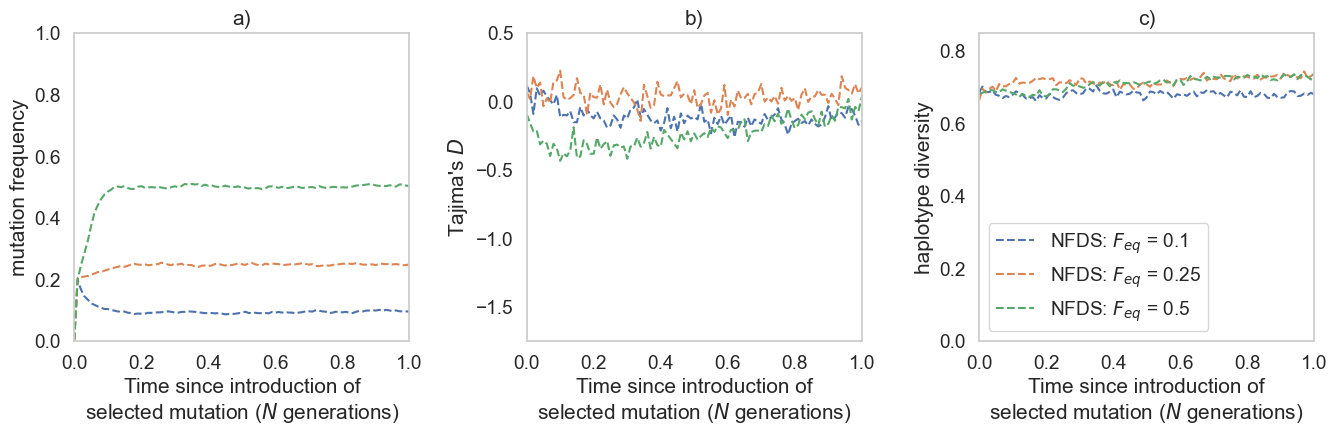

In [218]:
lst = []
for Nes in [100, 1000]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/sweep_traj/" + str(Nes) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst.append(df10)
    
    
lst2 = []
for Feq in [0.1, 0.25, 0.5]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/nfds_traj/" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst2.append(df10)



nfds_df = pd.read_csv(r"/Volumes/WD/nfds/nfds_traj/stats.txt", sep='\t', header=0)

nfds_hd_df = pd.DataFrame(nfds_df.groupby(['Feq', 'gen'])['hapdiv'].mean()).reset_index()
nfds_t_df = pd.DataFrame(nfds_df.groupby(['Feq', 'gen'])['tajd'].mean()).reset_index()


sns.set(rc={'figure.figsize':(16,4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
plt.subplot(1,3,1)

plt.plot(lst2[0].gen, lst2[0].AF, label= r'NFDS: $F_eq$ = 0.1', linestyle='--')
plt.plot(lst2[1].gen, lst2[1].AF, label= r'NFDS: $F_eq$ = 0.25', linestyle='--')
plt.plot(lst2[2].gen, lst2[2].AF, label= r'NFDS: $F_eq$ = 0.5', linestyle='--')


plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("mutation frequency")
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.title('a)')

plt.subplot(1,3,2)

plt.plot([t/500 for t in range(0,1005, 5)], nfds_t_df[nfds_t_df['Feq']==0.1]['tajd'], label= r'NFDS: $F_eq$ = 0.1', linestyle='--')
plt.plot([t/500 for t in range(0,1005, 5)], nfds_t_df[nfds_t_df['Feq']==0.25]['tajd'], label= r'NFDS: $F_eq$ = 0.25', linestyle='--')
plt.plot([t/500 for t in range(0,1005, 5)], nfds_t_df[nfds_t_df['Feq']==0.5]['tajd'], label= r'NFDS: $F_eq$ = 0.5', linestyle='--')


plt.xlim([0, 1])
plt.ylim([-1.75, 0.5])
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.ylabel(r"Tajima's $D$")
plt.title('b)')

plt.subplot(1,3,3)

plt.plot([t/500 for t in range(0,1005, 5)], nfds_hd_df[nfds_hd_df['Feq']==0.1]['hapdiv'], label= r'NFDS: $F_{eq}$ = 0.1', linestyle='--')
plt.plot([t/500 for t in range(0,1005, 5)], nfds_hd_df[nfds_hd_df['Feq']==0.25]['hapdiv'], label= r'NFDS: $F_{eq}$ = 0.25', linestyle='--')
plt.plot([t/500 for t in range(0,1005, 5)], nfds_hd_df[nfds_hd_df['Feq']==0.5]['hapdiv'], label= r'NFDS: $F_{eq}$ = 0.5', linestyle='--')


plt.xlim([0, 1])
plt.ylim([0, 0.85])
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.ylabel("haplotype diversity")
plt.title('c)')
plt.legend()
plt.subplots_adjust(wspace=0.35, hspace=0.45)

plt.savefig('/Volumes/WD/nfds/plots/S1.png', format='png', bbox_inches='tight')

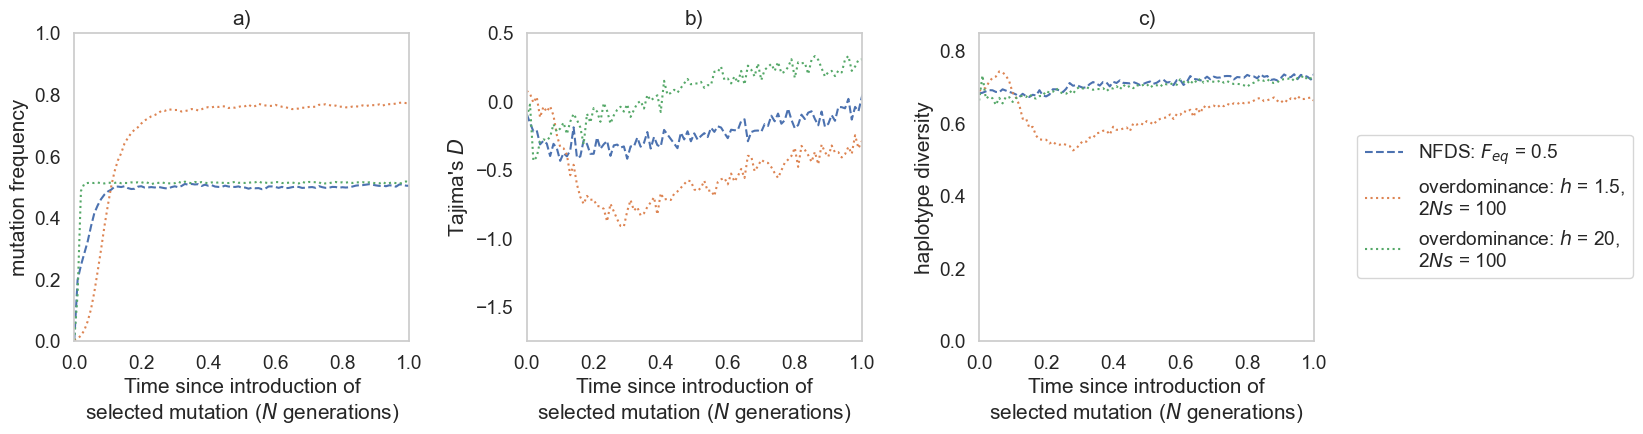

In [257]:
 
lst2 = []
for Feq in [0.1, 0.25, 0.5]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/nfds_traj/" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst2.append(df10)


lst3 = []
for Feq in [1.5, 20]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/od_traj/" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst3.append(df10)



od_df = pd.read_csv(r"/Volumes/WD/nfds/od_traj/stats.txt", sep='\t', header=0)
nfds_df = pd.read_csv(r"/Volumes/WD/nfds/nfds_traj/stats.txt", sep='\t', header=0)

od_hd_df = pd.DataFrame(od_df.groupby(['h', 'gen'])['hapdiv'].mean()).reset_index()
od_t_df = pd.DataFrame(od_df.groupby(['h', 'gen'])['tajd'].mean()).reset_index()
nfds_hd_df = pd.DataFrame(nfds_df.groupby(['Feq', 'gen'])['hapdiv'].mean()).reset_index()
nfds_t_df = pd.DataFrame(nfds_df.groupby(['Feq', 'gen'])['tajd'].mean()).reset_index()


sns.set(rc={'figure.figsize':(16,4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
plt.subplot(1,3,1)

plt.plot(lst2[2].gen, lst2[2].AF, label= r'NFDS: $F_eq$ = 0.5', linestyle='--')
plt.plot(lst3[0].gen, lst3[0].AF, label= r'overdominance: $h$ = 1.5', linestyle=':')
plt.plot(lst3[1].gen, lst3[1].AF, label= r'overdominance: $h$ = 20', linestyle=':')


plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("mutation frequency")
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.title('a)')

plt.subplot(1,3,2)
plt.plot([t/500 for t in range(0,1005, 5)], nfds_t_df[nfds_t_df['Feq']==0.5]['tajd'], label= r'NFDS: $F_eq$ = 0.5', linestyle='--')
plt.plot([t/500 for t in range(0,1005, 5)], od_t_df[od_t_df['h']==1.5]['tajd'], label= r'overdominance: $h$ = 1.5', linestyle=':')
plt.plot([t/500 for t in range(0,1005, 5)], od_t_df[od_t_df['h']==20]['tajd'], label= r'overdominance: $h$ = 20', linestyle=':')


plt.xlim([0, 1])
plt.ylim([-1.75, 0.5])
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.ylabel(r"Tajima's $D$")
plt.title('b)')

plt.subplot(1,3,3)
plt.plot([t/500 for t in range(0,1005, 5)], nfds_hd_df[nfds_hd_df['Feq']==0.5]['hapdiv'], label= r'NFDS: $F_{eq}$ = 0.5', linestyle='--')
plt.plot([t/500 for t in range(0,1005, 5)], od_hd_df[od_hd_df['h']==1.5]['hapdiv'], label= r'overdominance: $h$ = 1.5,' + '\n' +'2$Ns$ = 100', linestyle=':')
plt.plot([t/500 for t in range(0,1005, 5)], od_hd_df[od_hd_df['h']==20]['hapdiv'], label= r'overdominance: $h$ = 20,' + '\n' +'2$Ns$ = 100', linestyle=':')


plt.xlim([0, 1])
plt.ylim([0, 0.85])
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.ylabel("haplotype diversity")
plt.title('c)')
plt.legend(bbox_to_anchor=(1.1,0.7))
plt.subplots_adjust(wspace=0.35, hspace=0.45)

plt.savefig('/Volumes/WD/nfds/plots/S2.png', format='png', bbox_inches='tight')

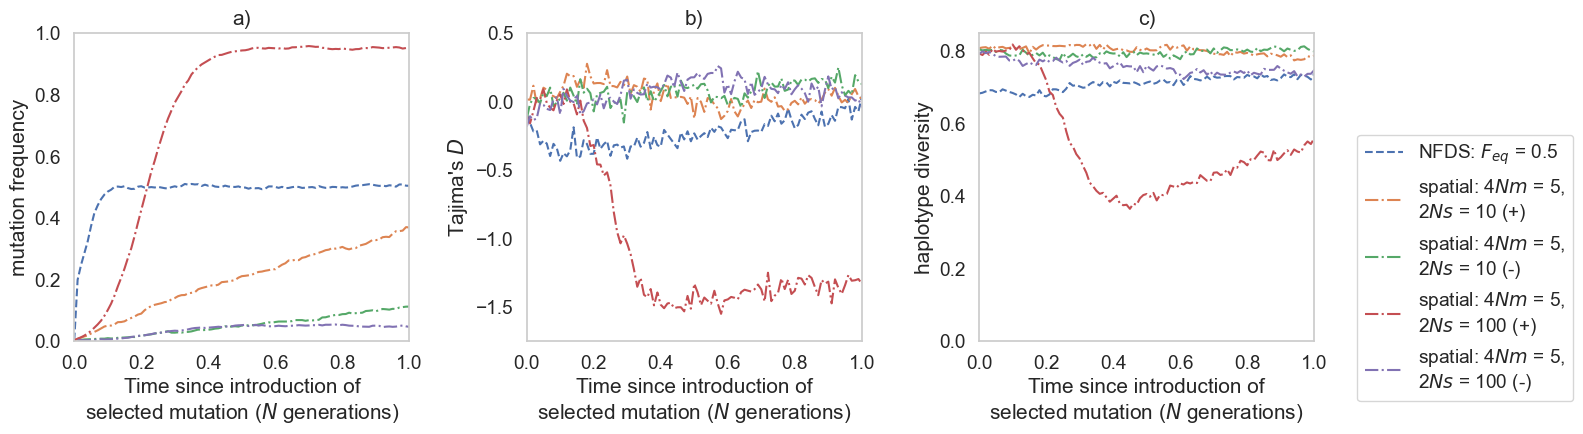

In [258]:
lst = []
for Nes in [100, 1000]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/sweep_traj/" + str(Nes) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst.append(df10)
    
    
lst2 = []
for Feq in [0.1, 0.25, 0.5]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/nfds_traj/" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst2.append(df10)


lst3 = []
for Feq in [1.5, 20]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/od_traj/" + str(Feq) + "_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst3.append(df10)


lst4 = []
for Feq in [10, 100]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/spat_traj/" + str(Feq) + "_0.0025_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df[df['pop']=='p1']
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst4.append(df10)


lst5 = []
for Feq in [10, 100]:
    rdf = pd.DataFrame()
    for i in range(1, 101):
        df = pd.read_csv(r"/Volumes/WD/nfds/spat_traj/" + str(Feq) + "_0.0025_rep"+str(i)+".bs", sep=' ', 
                         names=["out", "gen", "cycle", "x1", "pop", "id", "mut_type", "x2", "s", "x3", "x4", "intro_gen", "AC"])
        df = df[df['pop']=='p2']
        df = df.sort_values('id', ascending=False).drop_duplicates('gen').sort_index()
        df['gen_N'] = (df.gen - 5000) / 500
        df['AF'] = df.AC / 1000
        df['rep'] = i
        rdf = pd.concat([rdf, df])

    df10 = pd.DataFrame(rdf.groupby('gen_N')['AF'].mean())
    df10['gen'] = df10.index
    df10 = df10.reset_index(drop=True)
    lst5.append(df10)

sweep_df = pd.read_csv(r"/Volumes/WD/nfds/sweep_traj/stats.txt", sep='\t', header=0)
od_df = pd.read_csv(r"/Volumes/WD/nfds/od_traj/stats.txt", sep='\t', header=0)
nfds_df = pd.read_csv(r"/Volumes/WD/nfds/nfds_traj/stats.txt", sep='\t', header=0)
spat_df = pd.read_csv(r"/Volumes/WD/nfds/spat_traj/stats.txt", sep='\t', header=0)
spat_df1 = spat_df[(spat_df['population']=='p1') & (spat_df['s']==10)]
spat_df2 = spat_df[(spat_df['population']=='p2') & (spat_df['s']==10)]
spat_df3 = spat_df[(spat_df['population']=='p1') & (spat_df['s']==100)]
spat_df4 = spat_df[(spat_df['population']=='p2') & (spat_df['s']==100)]

sweep_hd_df = pd.DataFrame(sweep_df.groupby(['2Nes', 'gen'])['hapdiv'].mean()).reset_index()
sweep_t_df = pd.DataFrame(sweep_df.groupby(['2Nes', 'gen'])['tajd'].mean()).reset_index()
od_hd_df = pd.DataFrame(od_df.groupby(['h', 'gen'])['hapdiv'].mean()).reset_index()
od_t_df = pd.DataFrame(od_df.groupby(['h', 'gen'])['tajd'].mean()).reset_index()
nfds_hd_df = pd.DataFrame(nfds_df.groupby(['Feq', 'gen'])['hapdiv'].mean()).reset_index()
nfds_t_df = pd.DataFrame(nfds_df.groupby(['Feq', 'gen'])['tajd'].mean()).reset_index()
spat_hd_df1 = pd.DataFrame(spat_df1.groupby(['s', 'gen'])['hapdiv'].mean()).reset_index()
spat_t_df1 = pd.DataFrame(spat_df1.groupby(['s', 'gen'])['tajd'].mean()).reset_index()
spat_hd_df2 = pd.DataFrame(spat_df2.groupby(['s', 'gen'])['hapdiv'].mean()).reset_index()
spat_t_df2 = pd.DataFrame(spat_df2.groupby(['s', 'gen'])['tajd'].mean()).reset_index()
spat_hd_df3 = pd.DataFrame(spat_df3.groupby(['s', 'gen'])['hapdiv'].mean()).reset_index()
spat_t_df3 = pd.DataFrame(spat_df3.groupby(['s', 'gen'])['tajd'].mean()).reset_index()
spat_hd_df4 = pd.DataFrame(spat_df4.groupby(['s', 'gen'])['hapdiv'].mean()).reset_index()
spat_t_df4 = pd.DataFrame(spat_df4.groupby(['s', 'gen'])['tajd'].mean()).reset_index()


sns.set(rc={'figure.figsize':(16,4),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
plt.subplot(1,3,1)

plt.plot(lst2[2].gen, lst2[2].AF, label= r'NFDS: $F_eq$ = 0.5', linestyle='--')

plt.plot(lst4[0].gen, lst4[0].AF, label= r'spatial: $m$ = 0.1', linestyle='-.')
plt.plot(lst5[0].gen, lst5[0].AF, label= r'spatial: $m$ = 0.1', linestyle='-.')
plt.plot(lst4[1].gen, lst4[1].AF, label= r'spatial: $m$ = 0.1', linestyle='-.')
plt.plot(lst5[1].gen, lst5[1].AF, label= r'spatial: $m$ = 0.1', linestyle='-.')

plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("mutation frequency")
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.title('a)')

plt.subplot(1,3,2)

plt.plot([t/500 for t in range(0,1005, 5)], nfds_t_df[nfds_t_df['Feq']==0.5]['tajd'], label= r'NFDS: $F_eq$ = 0.5', linestyle='--')


plt.plot([t/500 for t in range(0,1005, 5)], spat_t_df1['tajd'], label= r'spatial: 4$Nm$ = 0.1', linestyle='-.')
plt.plot([t/500 for t in range(0,1005, 5)], spat_t_df2['tajd'], label= r'spatial: 4$Nm$ = 0.1', linestyle='-.')
plt.plot([t/500 for t in range(0,1005, 5)], spat_t_df3['tajd'], label= r'spatial: 4$Nm$ = 0.1', linestyle='-.')
plt.plot([t/500 for t in range(0,1005, 5)], spat_t_df4['tajd'], label= r'spatial: 4$Nm$ = 0.1', linestyle='-.')

plt.xlim([0, 1])
plt.ylim([-1.75, 0.5])
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.ylabel(r"Tajima's $D$")
plt.title('b)')

plt.subplot(1,3,3)

plt.plot([t/500 for t in range(0,1005, 5)], nfds_hd_df[nfds_hd_df['Feq']==0.5]['hapdiv'], label= r'NFDS: $F_{eq}$ = 0.5', linestyle='--')

plt.plot([t/500 for t in range(0,1005, 5)], spat_hd_df1['hapdiv'], label= r'spatial: 4$Nm$ = 5,' + '\n' +'2$Ns$ = 10 (+)', linestyle='-.')
plt.plot([t/500 for t in range(0,1005, 5)], spat_hd_df2['hapdiv'], label= r'spatial: 4$Nm$ = 5,' + '\n' +'2$Ns$ = 10 (-)', linestyle='-.')
plt.plot([t/500 for t in range(0,1005, 5)], spat_hd_df3['hapdiv'], label= r'spatial: 4$Nm$ = 5,' + '\n' +'2$Ns$ = 100 (+)', linestyle='-.')
plt.plot([t/500 for t in range(0,1005, 5)], spat_hd_df4['hapdiv'], label= r'spatial: 4$Nm$ = 5,' + '\n' +'2$Ns$ = 100 (-)', linestyle='-.')

plt.xlim([0, 1])
plt.ylim([0, 0.85])
plt.margins(0)
plt.xlabel(r'Time since introduction of' + "\n" + 'selected mutation ($N$ generations)')
plt.ylabel("haplotype diversity")
plt.title('c)')
plt.legend(bbox_to_anchor=(1.1,0.7))
plt.subplots_adjust(wspace=0.35, hspace=0.45)

plt.savefig('/Volumes/WD/nfds/plots/S3.png', format='png', bbox_inches='tight')